### The purpose of this tutorial is to walk through the execution of this code, starting with inputs and calculating the displacements and forces on the matrix defined. 

In [37]:
#Import Libraries

import sys
import os
import numpy as np
from src import *
from math_utils import *

### Establish nodes (x, y, z)
Establish elements to establish connectivity in the structure ([node1, node2, E, nu, A, Iz, Iy, Ip, J, z_axis])

Establish support conditions, 
    1 = free DOF, 
    0 = constrained  
    (Node index, x, y, z, z, y, p)

Establish applied forces, must establish for each node (Fx, Fy, Fz, Mx, My, Mz)

In [ ]:
#Define each node using the following template
#NodeX = [X, Y, Z]
node0 = [0, 0, 0]  
node1 = [10, 0, 0]  
node2 = [10, 20, 0]  
node3 = [0, 20, 0]  
node4 = [0, 0, 25]  
node5 = [10, 0, 25]  
node6 = [10, 20, 25]  
node7 = [0, 20, 25]  

nodes = np.array([node0, node1, node2, node3, node4, node5, node6, node7])

r = 0.5
pi = np.pi
#Define element using the following template
#ElementX = ([nodeX1, nodeX2, E, nu, A, Iz, Iy, Ip, J, z_axis])
element1 = [0, 4, 500, 0.5, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, None]
element2 = [4, 5, 500, 0.5, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, None]
element3 = [5, 6, 500, 0.5, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, None]
element4 = [6, 7, 500, 0.5, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, None]
element5 = [7, 4, 500, 0.5, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, None]
element6 = [2, 6, 500, 0.5, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, None]
element7 = [1, 5, 500, 0.5, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, None]
element8 = [3, 7, 500, 0.5, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, None]

element_connect = np.array([element1, element2, element3, element4, element5, element6, element7, element8], dtype=object)

# Assign support constraints for each node as delineated below, as either fixed, free, or pinned. 
# 0 = free DOF, 1 = constrained DOF
support_0 = [0, 1, 1, 1, 1, 1, 1]  # [node_id, 1, 1, 1, 1, 1, 1] Fixed Node
support_1 = [1, 1, 1, 1, 1, 1, 1]  # [node_id, 0, 0, 0, 0, 0, 0] Free Node
support_2 = [2, 1, 1, 1, 1, 1, 1]  # [node_id, 1, 1, 1, 0, 0, 0] Pinned Node
support_3 = [3, 1, 1, 1, 1, 1, 1]
support_4 = [4, 0, 0, 0, 0, 0, 0]
support_5 = [5, 0, 0, 0, 0, 0, 0]
support_6 = [6, 0, 0, 0, 0, 0, 0]
support_7 = [7, 0, 0, 0, 0, 0, 0]
supports = np.array([support_0, support_1, support_2, support_3, support_4, support_5, support_6, support_7])

force_applied = np.array([  [  0,   0,    0,   0,   0,   0], 
                            [  0,   0,    0,   0,   0,   0],
                            [  0,   0,    0,   0,   0,   0],
                            [  0,   0,    0,   0,   0,   0],
                            [  0,   0,    -1,   0,   0,   0],
                            [  0,   0,    -1,   0,   0,   0],
                            [  0,   0,    -1,   0,   0,   0],
                            [  0,   0,    -1,   0,   0,   0]])



### Compute Displacements and Forces, reformat for easier use

In [39]:
displacement, forces = structure(nodes, element_connect, force_applied, supports)
size = displacement.shape
n = size[0]/6
n = int(n)
reshape = np.reshape(displacement, (n, 6))
x_disp = reshape[:,0]
y_disp = reshape[:,1]
z_disp = reshape[:,2]
shape_force = forces.shape
n1 = shape_force[0]/6
n1 = int(n1)
reshape_forces = np.reshape(forces, (n,6))




### Results


In [40]:
print ('displacements=', reshape)
print ('forces = ', reshape_forces)

displacements= [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.30548799e-17  3.96534812e-22 -6.36619772e-02 -1.46428782e-20
   5.39610038e-19  1.52073804e-18]
 [ 3.30699787e-17  1.52257768e-17 -6.36619772e-02 -6.90400068e-19
   3.84517830e-19  1.52138867e-18]
 [-7.66341772e-21  1.52323682e-17 -6.36619772e-02 -9.54305127e-19
   2.92030366e-18  1.52188576e-18]
 [-0.00000000e+00  0.00000000e+00 -6.36619772e-02  1.18416630e-19
   8.65498232e-19  1.52126392e-18]]
forces =  [[-4.95927187e-19  3.44267238e-21  1.00000000e+00 -2.86577927e-20
  -6.72885076e-18 -9.95320719e-19]
 [-5.32754535e-19 -1.24327448e-19  1.00000000e+00  2.23189178e-18

### Plotting 


[ 0 10 10  0  0 10 10  0]


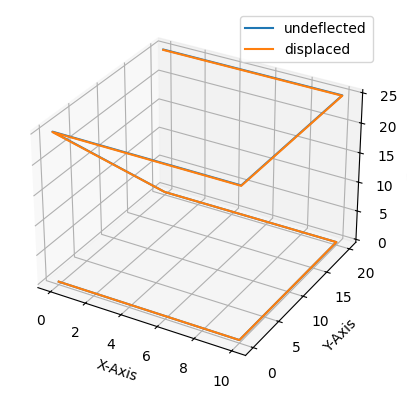

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
x = nodes [:,0]
x_1 = nodes [:,0] + x_disp
y = nodes [:,1]
y_1 = nodes [:,1] + y_disp
z = nodes [:,2]
z_1 = nodes [:,2] + z_disp
print (x)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot (x,y,z, label = 'undeflected')
ax.plot (x_1, y_1, z_1, label='displaced')
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')
plt.legend()
plt.show()